<a href="https://colab.research.google.com/github/Mostafizur979/Artificial-Intelligence-Lab/blob/main/AI_Lab4_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/carprices.csv')

In [ ]:
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [ ]:
df.describe()

,Mileage,Sell Price,Age
count,16.000000,16.000000,16.000000
mean,59156.250000,29206.250000,5.312500
std,18189.482996,10761.751329,1.579821
min,22500.000000,12000.000000,2.000000
25%,49750.000000,20750.000000,4.750000
50%,59000.000000,30450.000000,5.000000
75%,69750.000000,33250.000000,6.250000
max,91000.000000,55000.000000,8.000000


In [ ]:
dummy=pd.get_dummies(df['Car Model'])

In [ ]:
dummy

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [ ]:
final=pd.concat([dummy,df],axis=1)

In [ ]:
final

,Audi,BMW X5,Mercedez Benz,Toyota,Car Model,Mileage,Sell Price,Age
0,0,1,0,0,BMW X5,69000,18000,6
1,0,1,0,0,BMW X5,35000,34000,3
2,0,1,0,0,BMW X5,57000,26100,5
3,0,1,0,0,BMW X5,22500,40000,2
4,0,1,0,0,BMW X5,46000,31500,4
5,1,0,0,0,Audi,59000,29400,5
6,1,0,0,0,Audi,52000,32000,5
7,1,0,0,0,Audi,72000,19300,6
8,1,0,0,0,Audi,91000,12000,8
9,0,0,1,0,Mercedez Benz,67000,22000,6


In [ ]:
final=final.drop(['Car Model'],axis=1)
final

,Audi,BMW X5,Mercedez Benz,Toyota,Mileage,Sell Price,Age
0,0,1,0,0,69000,18000,6
1,0,1,0,0,35000,34000,3
2,0,1,0,0,57000,26100,5
3,0,1,0,0,22500,40000,2
4,0,1,0,0,46000,31500,4
5,1,0,0,0,59000,29400,5
6,1,0,0,0,52000,32000,5
7,1,0,0,0,72000,19300,6
8,1,0,0,0,91000,12000,8
9,0,0,1,0,67000,22000,6


In [ ]:
x= final[['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ','Toyota']]

In [ ]:
x

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,6,0,1,0,0
1,35000,3,0,1,0,0
2,57000,5,0,1,0,0
3,22500,2,0,1,0,0
4,46000,4,0,1,0,0
5,59000,5,1,0,0,0
6,52000,5,1,0,0,0
7,72000,6,1,0,0,0
8,91000,8,1,0,0,0
9,67000,6,0,0,1,0


In [ ]:
y=final['Sell Price']

In [ ]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
13    42000
14    32000
15    55000
Name: Sell Price, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

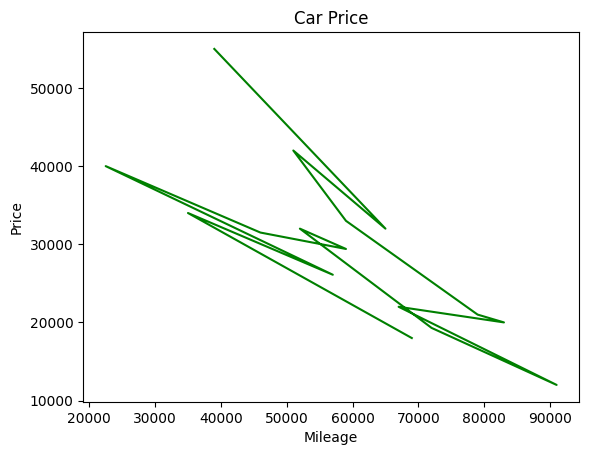

In [ ]:
plt.plot(x['Mileage'],y, color='green')
plt.title('Car Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35 , random_state=1)

In [ ]:
x_test

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
3,22500,2,0,1,0,0
13,51000,4,0,0,0,1
7,72000,6,1,0,0,0
2,57000,5,0,1,0,0
6,52000,5,1,0,0,0
10,83000,7,0,0,1,0


In [ ]:
y_test

3     40000
13    42000
7     19300
2     26100
6     32000
10    20000
Name: Sell Price, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.predict(x_test)

array([44762.21039449, 34292.79899812, 21287.85222292, 23897.18221666,
       37174.51471509, 15050.845335  ])

In [ ]:
y_test

3     40000
13    42000
7     19300
2     26100
6     32000
10    20000
Name: Sell Price, dtype: int64

In [ ]:
plt.plot()